# CONTEXTO DO TRATAMENTO

   Não há hábito "contra" a doença (-1), somente "pró" doença(+1), ou seja não ter o "hábito"(0). No sentido de CONTRAIR a doença há duas possibilidades:
    
    -Exposição prolongada à poluição, fumaça e gases
    -Características genéticas
    
   O segundo não é possível de se obter informação da base de dados. O segundo já seria possível, ou seja o divisor de águas entre ter ou não ter a doença é a EXPOSIÇÃO PROLONGADA à poluição, fumação e gases. Todavia, não há um grau preciso de quanto é necessário de exposição para que se tenha a doença, ou seja, é necessário visualizar do ponto de vista do RISCO de EXPOSIÇÃO aos elementos citados e em quanto TEMPO. Todavia, a faixa temporal para determinados aspectos não é boa. Ou seja, o ponto principal de análise e construção de uma base de dados que delimite o grau de RISCO terá por base em delimitar a ausência dos comportamentos presentes.
   
   O trabalho seria ideal se fosse delimitado quantos ANOS foi exposto aos elementos da doença. Delimitados como atributo por atributo.
   
   Por fim, cada atributo da base de dados será analisado no seguinte aspecto: "Em nível numérico, em uma faixa dependendo do atributo, que avalie o QUÃO EXPOSTA À FUMAÇA, GASES E POLUIÇÃO a pessoa está." Atributos que não são relacionados a esse aspecto serão descartados, e a alimentação e o exerício físico relacionam-se quanto o quão o corpo está, contudo a exposição do tecido pulmonar é irrelevante quanto à pessoas que tem boas ou más práticas, sendo somente um fator que afeta os SINTOMAS da doença e não à CONTRAIR a doença.
   
    "...o diagnóstico da DPOC se fundamenta em três pilares que seriam expressão clínica caracterizada por tosse crônica e ou a presença dispneia, histórico de exposição algum fator de risco, em especial história de tabagismo e avaliação funcional através da espirometria que confirma a presença de processo obstrutivo pulmonar."
http://www.sopterj.com.br/wp-content/themes/_sopterj_redesign_2017/_revista/2017/n_01/03-artigo.pdf
   
   Assim sendo cada coluna sempre terá a mente o QUÃO EXPOSTA À FUMAÇA, GASES E POLUIÇÃO a pessoa está. Sendo que o principal desafio seria delimitar o grande de chance de 0 a 100 que pessoa têm, no sentido da doença. Isso, o dado não aponta, sendo necessário perder-se o rigor e esperar que a concatenação de atribuições aponte para um perfil razoável, tendo em vista os pacientes que têm a doença e estão registrados na base. Maiores relações do quão exposto estaria a pessoal dado a dado, será registrado em cada atributo.

Tendo em vista esse contexto, têm-se os seguintes problemas:

    1. Outliers seriam ocultados em uma análise de discretização que proponho a realizar
    2. O risco é avaliado somente dentro do espectro do atributo em si, e enquanto à relação entre os demais atributos, como seria?
    3. As próprias perguntas no dicionário de dados são vagas ou faltam informações em nível temporal quanto ao evento.
    4. A metodologia escolhida para determinação de perguntas realizadas pela pesquisa
    5. O conhecimento tácito e explícito que por vezes faltará para análise mais criteriosa de um dado
    6. A ausência de séries temporais para análise de diversos atributos

OUTLIERS AINDA DEVEM SER RETIRADOS, COMO SERÁ DEMONSTRADO EM ALGUNS ATRIBUTOS

    Box Plot (Diagrama de Caixa) , Histograma, Z-Score, IQR (Interquartile Range) Method:, Análise de Regras de Negócio

In [ ]:
#Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#Leitura do arquivo no computador
DPOC = pd.read_csv('C:\\Users\\Ranier\\ProjetoArtigoBD\\DPOCVariaveis2.csv',';')

C:\Users\Ranier\AppData\Local\Temp\ipykernel_13096\4235299010.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  DPOC = pd.read_csv('C:\\Users\\Ranier\\ProjetoArtigoBD\\DPOCVariaveis2.csv',';')


In [ ]:
#Leitura do arquivo no MAC
#DPOC = pd.read_csv('/Users/alexandre/Desktop/Artigo/DPOCVariaveis2.csv',';')

In [ ]:
DPOC

,V0026,A016010,C008,E01201,M009,M011011,M011071,P00103,P00104,P00403,...,Q074,Q11604,Q11605,Q11606,W00101,W00102,W00103,W00201,W00201.1,W00203
0,1,1,55,5221.0,2.0,2.0,2.0,60,60.0,145.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,19,5132.0,3.0,2.0,2.0,65,65.0,152.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,45,9112.0,3.0,1.0,2.0,77,77.0,155.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,58,9112.0,3.0,2.0,2.0,NaN,56.0,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,28,NaN,NaN,NaN,NaN,55,55.0,176.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,2,2,54,4131.0,1.0,2.0,2.0,63,63.0,168.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90842,2,1,44,8321.0,2.0,2.0,2.0,72,72.0,168.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90843,2,3,32,NaN,NaN,NaN,NaN,87,87.0,163.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90844,2,3,54,7514.0,3.0,2.0,2.0,89,89.0,168.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DPOC.columns

Index(['V0026', 'A016010', 'C008', 'E01201', 'M009', 'M011011', 'M011071',
       'P00103', 'P00104', 'P00403', 'P00404', 'P050', 'P051', 'P052', 'P053',
       'P05401', 'P05402', 'P05403', 'P05404', 'P05405', 'P05406', 'P05407',
       'P05408', 'P05409', 'P05410', 'P05411', 'P05412', 'P05413', 'P05414',
       'P05415', 'P05416', 'P05417', 'P05418', 'P05419', 'P05421', 'P05422',
       'P058', 'P05801', 'P05802', 'P05901', 'Q074', 'Q11604', 'Q11605',
       'Q11606', 'W00101', 'W00102', 'W00103', 'W00201', 'W00201.1', 'W00203'],
      dtype='object')

## Cada coluna do conjunto selecionado será trabalhada com a descrição no dicionário de dados e em sequência as transformações aplicadas.

| V0026 | Tipo de situação censitária |
|--------|-----------------------------|
|   1    |            Urbano           |
|   2    |            Rural            |

Moradores de áreas urbanas estão mais expostas à poluição do que em relação à áreas rurais. Em que grau, é indeterminado. Ou seja, em grau de risco, o Urbano é maior que Rural. Não há dado que indique a quanto tempo a pessoa está presente nesse domicílio.

In [ ]:
DPOC['V0026'].isnull().sum()

0

In [ ]:
#Coluna original
DPOC['V0026'].value_counts()

1    69873
2    20973
Name: V0026, dtype: int64

In [ ]:
#Aonde troca-se o valor de urbano de 1 para 2. O valor de rural de 2 para 1.
DPOC['V0026'] = DPOC['V0026'].map({1: 2, 2: 1})
DPOC = DPOC.rename(columns={'V0026': 'RiscoDom'})

In [ ]:
DPOC['RiscoDom'].value_counts()

2    69873
1    20973
Name: RiscoDom, dtype: int64

| A016010 | Destino do lixo                                            |
|--------|------------------------------------------------------------|
|   1    | Coletado diretamente por serviço de limpeza                |
|   2    | Coletado em caçamba de serviço de limpeza                   |
|   3    | Queimado (na propriedade)                                   |
|   4    | Enterrado (na propriedade)                                  |
|   5    | Jogado em terreno baldio ou logradouro                      |
|   6    | Outro                                                      |
|   9    | Ignorado                                                   |
|  Não   | Não aplicável (se a pergunta não se aplica à situação atual) |

A única ação que gere gases e que por consequência exposição é a queima de lixo na propriedade, o problema é a definição de aonde esse lixo está sendo queimado? Longe da casa? No fogão a lenha? Próximo ao muro? Díficil definição.

In [ ]:
#Coluna original
DPOC['A016010'].value_counts()

1    71302
3    12773
2     4926
5      926
4      533
6      386
Name: A016010, dtype: int64

In [ ]:
DPOC['A016010'].isnull().sum()

0

In [ ]:
#Tudo aquilo que não é queimado será desconsiderado tendo em vista não ter capacidade de produzir gases tóxicos.
#Os valores nulos são preservados
#3 = Torna-se 1 e o restante é 0
DPOC["A016010"] = DPOC["A016010"].astype(int).apply(lambda x: np.nan if pd.isnull(x) else 1 if x == 3 else 0)
DPOC = DPOC.rename(columns={'A016010': 'lixo_queima'})

In [ ]:
#Coluna original
DPOC['lixo_queima'].value_counts()

0    78073
1    12773
Name: lixo_queima, dtype: int64

| C008 | Idade do morador na data de referência |
|--------|----------------------------------------|
| 000-130| Idade (em anos)                        |
|  Não   | Não aplicável                          |

Idade é um fator complicado para se definir como discretização. Tendo em vista que a DPOC tende a atacar pessoas com longa exposição aos elementos citados no início. Há reafirmações constantes de que o diagnóstico é frequente em pessoas de meia-idade, sendo essa faixa razoavelmente arbitrária, entre 40-60 anos https://www.britannica.com/science/middle-age. Contudo, por exemplo, isso não eliminaria pessoas que fumam desde novas. Tendo em vista que as demais colunas vão apresentar fatores de risco concomitantes, creio que o corte temporal aonde registra-se DPOC seria interessante analisar a partir de 30 anos, sendo esse um corte arbitrário. O problema, novamente, o quanto de risco seria de faixa para faixa.

| Idade | Grau de risco |
|--------|----------------------------------------|
| 0-30| 0                       |
| 30-40| 1                       |
| 40-50| 2                      |
| 50-60| 3                       |
| 60+| 4                       |

Inicialmente em aula até comentei sobre o corte forçado de pessoas com mais de 40 anos com "1" mas seria um corte muito arbitrário, apesar de fundamentado.

Possíveis adições e análises
Adicionar um fator de risco entre 20-30 anos.
Outro fator de corte, mas que levaria à uma possível contaminação de dados é levar em conta a seguinte questão:
Talvez para descarte, pela razão gênica !!! - Necessário estudar posteriormente

Exclusão de pessoas que tiveram o diagnóstico quando criança, já que seria por razão gênica.

| Q11701 | Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?  |
|--------|----------------------------------------|
| 0 | Menos que um ano de idade                        |
|1-98| Anos                         |
|99 | Ignorado                          |
|   | Não aplicável                          |

In [ ]:
#Coluna original
DPOC['C008'].value_counts()

37     1990
39     1904
36     1882
35     1833
38     1820
       ... 
99        6
100       5
104       3
102       1
107       1
Name: C008, Length: 91, dtype: int64

In [ ]:
DPOC['C008'].isnull().sum()

0

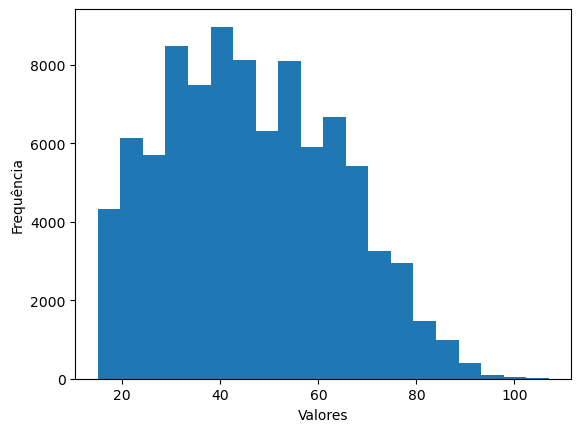

In [ ]:
#Visualizacao da distribuicao atual do atributo
plt.hist(DPOC["C008"], bins=20)
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

Retirada de outliers da coluna C008, referente à idade

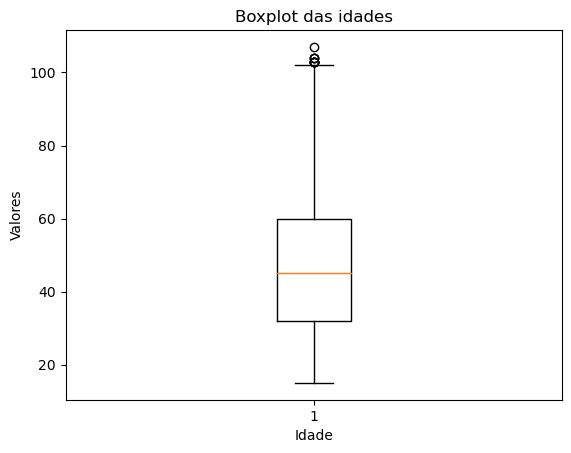

In [ ]:
plt.boxplot(DPOC['C008'])
plt.xlabel('Idade')
plt.ylabel('Valores')
plt.title('Boxplot das idades')
plt.show()

In [ ]:
Q1 = DPOC['C008'].quantile(0.25)
Q3 = DPOC['C008'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

DPOC = DPOC[(DPOC['C008'] >= limite_inferior) & (DPOC['C008'] <= limite_superior)]

OUTLIERS RETIRADOS VIA BLOXPOT

In [ ]:
# Definir os limites das faixas de risco
limites = [0, 30, 40, 50, 60, 130]

# Definir os rótulos correspondentes às faixas de risco
rotulos = [0, 1, 2, 3, 4]

# Discretizar a coluna de idade em faixas de risco
DPOC['idade_risco'] = pd.cut(DPOC['C008'], bins=limites, labels=rotulos, right=False)
#DPOC = DPOC.rename(columns={'C008': 'idade_risco'})

#----O código abaixo era referente a uma discretização básica sem análise.#
#Discretização em faixas de 10 anos.
#from sklearn.preprocessing import KBinsDiscretizer

#Uso do kmeans - kmeans: divide os valores de maneira que cada intervalo corresponda a um cluster gerado pelo algoritmo de k-means.
#Nessa estratégia, o número de clusters é igual ao número de intervalos especificados pelo usuário.
#discretizer = KBinsDiscretizer(n_bins=13, encode='ordinal', strategy='kmeans')
#coluna_idades = DPOC['C008'].values.reshape(-1, 1)
#idades_discretizadas = discretizer.fit_transform(coluna_idades)
#DPOC['C008'] = idades_discretizadas
#DPOC = DPOC.rename(columns={'C008': 'idade'})

In [ ]:
DPOC["idade_risco"].value_counts()

4    22718
1    18150
0    17709
2    16602
3    15657
Name: idade_risco, dtype: int64

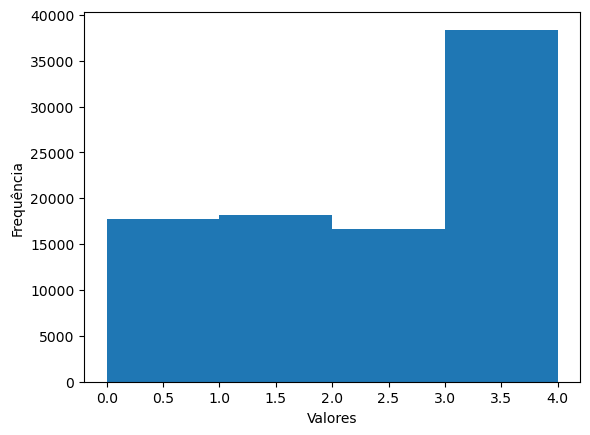

In [ ]:
#Visualizacao da distribuicao após cortes
plt.hist(DPOC["idade_risco"], bins=4)
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

| E01201 |Qual era a ocupação (cargo ou função) que ___ tinha nesse trabalho                               |
|--------|----------------------------------------------------------------|
|  Código| Ver "Classificação nacional de ocupações para pesquisas domiciliares (COD) 2010" |
|  9999  | Ignorado                                                       |
|  Não   | Não aplicável (se a pergunta não se aplica à situação atual)     |

Ou seja, será necessário identificar quais as ocupações de risco associadas a DPOC. Na maioria dos casos são aquelas com chances de exposição prolongada a poeira, gases tóxicos e poluição. Em grande parte são trabalhadores da área química, construção civil, indústria e mineração.

A lista foi escolhida foi manualmente de acordo com esse documento: https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/metodologia/anexos/anexo_7_ocupacao_cod.pdf

| Código | Ocupação |
| --- | --- |
| 2113 | QUÍMICOS |
| 2114 | GEÓLOGOS E GEOFÍSICOS |
| 2142 | ENGENHEIROS CIVIS |
| 2145 | ENGENHEIROS QUÍMICOS |
| 2146 | ENGENHEIROS DE MINAS, METALÚRGICOS E AFINS |
| 3112 | TÉCNICOS EM ENGENHARIA CIVIL |
| 3116 | TÉCNICOS EM QUÍMICA INDUSTRIAL |
| 3117 | TÉCNICOS EM ENGENHARIA DE MINAS E METALURGIA |
| 3121 | SUPERVISORES DA MINERAÇÃO |
| 3122 | SUPERVISORES DE INDÚSTRIAS DE TRANSFORMAÇÃO |
| 3123 | SUPERVISORES DA CONSTRUÇÃO |
| 3133 | CONTROLADORES DE INSTALAÇÕES DE PROCESSAMENTO DE PRODUTOS QUÍMICOS |
| 3134 | OPERADORES DE INSTALAÇÕES DE REFINO DE PETRÓLEO E GÁS NATURAL |
| 3135 | CONTROLADORES DE PROCESSOS DE PRODUÇÃO DE METAIS |
| 7111 | CONSTRUTORES DE CASAS |
| 7112 | PEDREIROS |
| 7113 | CANTEIROS, CORTADORES E GRAVADORES DE PEDRAS |
| 7114 | TRABALHADORES EM CIMENTO E CONCRETO ARMADO |
| 7115 | CARPINTEIROS |
| 7119 | OUTROS TRABALHADORES QUALIFICADOS E OPERÁRIOS DA CONSTRUÇÃO NÃO CLASSIFICADOS ANTERIORMENTE |
| 7121 | TELHADORES |
| 7122 | APLICADORES DE REVESTIMENTOS CERÂMICOS, PASTILHAS, PEDRAS E MADEIRAS |
| 7123 | GESSEIROS |
| 7124 | INSTALADORES DE MATERIAL ISOLANTE TÉRMICO E ACÚSTICO |
| 7125 | VIDRACEIROS |
| 7126 | BOMBEIROS E ENCANADORES |
| 7127 | MECÂNICOS-INSTALADORES DE SISTEMAS DE REFRIGERAÇÃO E CLIMATIZAÇÃO |
| 7211 | MOLDADORES DE METAL E MACHEIROS |
| 7212 | SOLDADORES E OXICORTADORES |
| 7213 | CHAPISTAS E CALDEIREIROS |
| 7214 | MONTADORES DE ESTRUTURAS METÁLICAS |
| 7215 | APARELHADORES E EMENDADORES DE CABOS |
| 7544 | FUMIGADORES E OUTROS CONTROLADORES DE PRAGAS E ERVAS DANINHAS |
| 8111 | MINEIROS E OPERADORES DE MÁQUINAS E DE INSTALAÇÕES EM MINAS E PEDREIRAS |
| 8112 | OPERADORES DE INSTALAÇÕES DE PROCESSAMENTO DE MINERAIS E ROCHAS |
| 8113 | PERFURADORES E SONDADORES DE POÇOS E AFINS |
| 8114 | OPERADORES DE MÁQUINAS PARA FABRICAR CIMENTO, PEDRAS E OUTROS PRODUTOS MINERAIS |
| 8131 | OPERADORES DE INSTALAÇÕES E MÁQUINAS DE PRODUTOS QUÍMICOS |
| 8132 | OPERADORES DE MÁQUINAS PARA FABRICAR PRODUTOS FOTOGRÁFICOS |
| 9311 | TRABALHADORES ELEMENTARES DE MINAS E PEDREIRAS |
| 9312 | TRABALHADORES ELEMENTARES DE OBRAS PÚBLICAS E DA MANUTENÇÃO DE ESTRADAS, REPRESAS E SIMILARES |
| 9313 | TRABALHADORES ELEMENTARES DA CONSTRUÇÃO DE EDIFÍCIOS |

Um problema nesse sentido é a falta de determinação de quanto tempo a pessoa ficou nesse trabalho. Além disso, qual era o nível de equipamento de proteção oferecido e utilizado pelo trabalhador à época. Dados que não são recuperáveis no estudo da PNS. Seria um atributo forte para descarte

In [ ]:
#Coluna original
DPOC['E01201'].value_counts()

9111.0    3229
6111.0    2662
5221.0    2081
4110.0    1717
7112.0    1693
          ... 
7133.0       1
4414.0       1
5162.0       1
3155.0       1
2523.0       1
Name: E01201, Length: 417, dtype: int64

In [ ]:
#NaN - São aonde são pessoas sem ocupação. O problema principal é a faixa temporal
DPOC['E01201'].isnull().sum()

38004

In [ ]:
#Binarização dos códigos que seriam considerados ocupações de risco. Aonde 1 = Ocupação identificada acima e 0 = Qualquer outra situação
#A operação só é realizada com valores inteiros, conversão de NaN para 0
DPOC["E01201"] = DPOC["E01201"].fillna(0)
DPOC["E01201"] = DPOC["E01201"].astype(int).apply(lambda x: 1 if x in [2113, 2114, 2142, 2145, 2146, 3112, 3116, 3117, 3121, 3122, 3123, 3133, 3134, 3135, 7111, 7112, 7113, 7114, 7115, 7119, 7121, 7122, 7123, 7124, 7125, 7126, 7127, 7211, 7212, 7213, 7214, 7215, 7544, 8111, 8112, 8113, 8114, 8131, 8132, 9311, 9312, 9313] else 0)
DPOC = DPOC.rename(columns={'E01201': 'risco_ocupacional'})

In [ ]:
DPOC['risco_ocupacional'].value_counts()

0    86984
1     3852
Name: risco_ocupacional, dtype: int64

|M009|O(a) Sr(a) normalmente trabalha(va) em ambientes|
|---|---|
||O(a) Sr(a) normalmente trabalha(va) em:|
|1|Fechados|
|2|Abertos|
|3|Ambos|
| |Não aplicável|

Ambientes de trabalho são complicados, mesmo que o espaço seja aberto, ele pode entrar em contato com a fumaça, mesmo em espaço aberto. Ou ter trabalhado durante anos com pessoas que fumavam - fumante passivo. Muito complicado determinar como seria. Fazendo mais um corte arbitrário. Os valores seguiriam na lógica de grau de risco:

| Grau de Risco | Ambiente |
|---|---|
|1| Abertos|
|2| Ambos|
|3| Fechados |
|0| Não aplicável |

Adição possível:
Outra análise plausível, seria adicionar mais um grau de risco, aonde os trabalhadores identificados na coluna de risco ocupacional seriam classificados de acordo com o espaço que trabalhavam.

In [ ]:
#Coluna original
DPOC['M009'].value_counts()

1.0    26115
2.0    16132
3.0    10585
Name: M009, dtype: int64

In [ ]:
#Mesmos problemas da ocupação
DPOC['M009'].isnull().sum()

38004

In [ ]:
#Trabalho sobre risco ambiental. Ou seja, vamos trabalhar com exposicao prolongada em espacos fechados.
#Obviamente nao ha um corte temporal ou definir horas. Trabalho sobre, aonde fechado = 1 e o restante = 0..
DPOC['M009'] = DPOC['M009'].fillna(0)
DPOC['M009'] = DPOC['M009'].map({1: 3, 2: 1, 3: 2})
DPOC = DPOC.rename(columns={'M009': 'ambiente_ocupacional'})

In [ ]:
DPOC['ambiente_ocupacional'].value_counts()

3.0    26115
1.0    16132
2.0    10585
Name: ambiente_ocupacional, dtype: int64

In [ ]:
DPOC['ambiente_ocupacional'] = DPOC['ambiente_ocupacional'].fillna(0)

In [ ]:
DPOC['ambiente_ocupacional'].isnull().sum()

0

|M011011| No(s) seu(s) trabalho(s), o(a) Sr(a) está(estava) exposto(a) a algum destes fatores que podem afetar a sua saúde. Manuseio de substâncias químicas (agrotóxicos, gasolina, diesel, formol, chumbo, mercúrio, cromo, quimioterápicos etc.)|
|---|---|
|1|Sim|
|2|Não|
|0|Não aplicável|

Aplica-se o Grau de risco aonde:

|Grau de Risco|Ambiente|
|---|---|
|0| Não|
|1| Sim|
|0| Não aplicável |


In [ ]:
#Coluna original
DPOC['M011011'].value_counts()

2.0    45633
1.0     7199
Name: M011011, dtype: int64

In [ ]:
#Mesmos problemas da ocupação
DPOC['M011011'].isnull().sum()

38004

In [ ]:
DPOC['M011011'] = DPOC['M011011'].map({1: 1, 2: 0})
DPOC = DPOC.rename(columns={'M011011': 'ocupQuimicos'})

In [ ]:
DPOC['ocupQuimicos'] = DPOC['ocupQuimicos'].fillna(0)

In [ ]:
DPOC['ocupQuimicos'].value_counts()

0.0    83637
1.0     7199
Name: ocupQuimicos, dtype: int64

|M011071| No(s) seu(s) trabalho(s), o(a) Sr(a) está exposto(a) a algum destes fatores que podem afetar a sua saúde Exposição à poeira mineral (pó de mármore, de areia, de brita, de vidro (sílica), de amianto (asbesto), de ferro ou aço)
|---|---|
|1|Sim|
|2|Não|
|0|Não aplicável|

Aplica-se o Grau de risco aonde:

|Grau de Risco|Ambiente|
|---|---|
|0| Não|
|1| Sim|

In [ ]:
#Coluna original
DPOC['M011071'].value_counts()

2.0    47288
1.0     5544
Name: M011071, dtype: int64

In [ ]:
#Mesmos problemas da ocupação
DPOC['M011071'].isnull().sum()

38004

In [ ]:
DPOC['M011071'] = DPOC['M011071'].map({1: 1, 2: 0})
DPOC = DPOC.rename(columns={'M011071': 'ocupMineral'})

In [ ]:
DPOC['ocupMineral'] = DPOC['ocupMineral'].fillna(0)

In [ ]:
DPOC['ocupMineral'].value_counts()

0.0    85292
1.0     5544
Name: ocupMineral, dtype: int64

# PESOS E ALTURAS - IMC

Pesos e Alturas, seria necessário diferenciar entre antropometria (Módulo W). Creio que os pesos e as alturas seriam declarados pelos entrevistados? Ou pesa-se no momento? A extração do dado é meio incógnito.No caso irei pegar a altura e o peso declarados nesse bloco serão transformados em IMC. Porquê? Alega-se sobre o "volume corporal" da pessoa, quanto maior, mais tecido pulmonar, razoável de se pensar que seria necessário mais elementos para que seja atacada dessa forma. Após o cálculo do IMC, verificar as faixas de obesidade e discretizar nesse sentido. Fórmula IMC = PESO(kg)/(ALTURA(m))^2

    Pesos

|P00103| Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
|---|---|
|1 a 599|Quilogramas|
||Não aplicável|

|P00104| Peso - Final (em kg) (3 inteiros e 1 casa decimal)
|---|---|
|1 a 599|Quilogramas|
||Não aplicável|

    Pesos Antropometria

|   Coluna  |       Descrição      |    Faixa de Valores    |      Unidade      |
|:---------:|:-------------------:|:---------------------:|:-----------------:|
|  W00101   | Peso - 1ª pesagem   |       20 a 200        |    Quilogramas    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |
|           |        999          |        Erro           | Não aplicável     |
|  W00102   | Peso - 2ª pesagem   |       20 a 200        |    Quilogramas    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |
|           |        999          |        Erro           | Não aplicável     |
|  W00103   | Peso - Final        |       20 a 200        |    Quilogramas    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |


    Alturas

|P00403| Altura - Informada (em cm) (3 inteiros)
|---|---|
|1 a 299|Centímetros|
|999|Ignorado|
||Não aplicável|

|P00404| Altura - Final (em cm) (3 inteiros)
|---|---|
|1 a 299|Centímetros|
|999|Ignorado|
||Não aplicável|
    
    Alturas Antropometria
    
|   Coluna  |       Descrição      |    Faixa de Valores    |      Unidade      |
|:---------:|:-------------------:|:---------------------:|:-----------------:|
|           |        999          |        Erro           | Não aplicável     |
|  W00201   | Altura - 1ª medição |       110 a 210       |    Centímetros    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |
|           |        999          |        Erro           | Não aplicável     |
|  W00202   | Altura - 2ª medição |       110 a 210       |    Centímetros    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |
|           |        999          |        Erro           | Não aplicável     |
|  W00203   | Altura - Final      |       110 a 210       |    Centímetros    |
|           | (3 inteiros e 1     |                       |                   |
|           |   casa decimal)     |                       |                   |
|           |        999          |        Erro           | Não aplicável     |

In [ ]:
DPOC['P00103'].isnull().sum()

7767

In [ ]:
#Os valores ausentes serao descartados
DPOC['P00104'].isnull().sum()

892

In [ ]:
DPOC['P00403'].isnull().sum()

15201

In [ ]:
#Os valores ausentes serao descartados
DPOC['P00404'].isnull().sum()

892

In [ ]:
#Muitos dados ausentes
DPOC['W00101'].isnull().sum()

84269

In [ ]:
DPOC['W00102'].isnull().sum()

84269

In [ ]:
DPOC['W00103'].isnull().sum()

84108

In [ ]:
DPOC['W00201'].isnull().sum()

84277

In [ ]:
DPOC['W00201.1'].isnull().sum()

84277

In [ ]:
DPOC['W00203'].isnull().sum()

84108

In [ ]:
#Após análise e reflexão, decidi preservar os valores referentes aos pesos e alturas finais.
#As demais colunas e valores nulos serão descartados.

# Especifique as colunas a serem removidas
colunas_para_remover = ['P00103', 'P00403', 'W00101','W00102','W00103','W00201','W00201.1','W00203']

# Remova as colunas especificadas
DPOC = DPOC.drop(colunas_para_remover, axis=1)

In [ ]:
#Preservando as altura e pesos em uma medida final, agora elimina-se os valores ausentes.
# Especifique as colunas em que você deseja verificar valores NaN
colunas_verificar = ['P00104', 'P00404']

# Remova as linhas que contêm valores NaN nas colunas especificadas
DPOC = DPOC.dropna(subset=colunas_verificar)

Agora necessário retirar outliers de altura e peso.

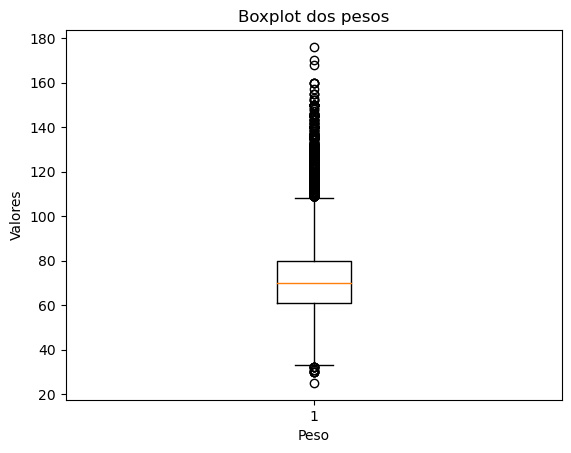

In [ ]:
plt.boxplot(DPOC['P00104'])
plt.xlabel('Peso')
plt.ylabel('Valores')
plt.title('Boxplot dos pesos')
plt.show()

In [ ]:
Q1 = DPOC['P00104'].quantile(0.25)
Q3 = DPOC['P00104'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

DPOC = DPOC[(DPOC['P00104']>= limite_inferior) & (DPOC['P00104'] <= limite_superior)]


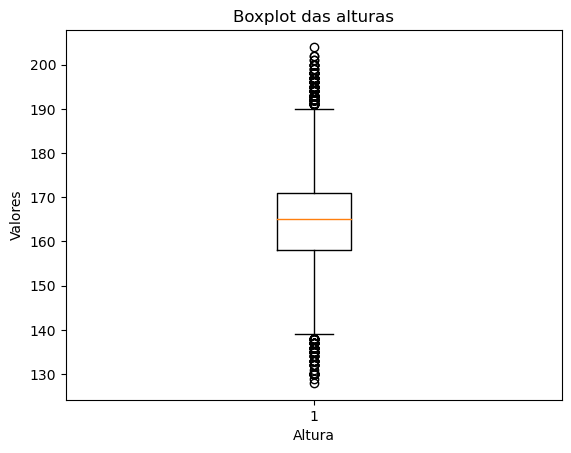

In [ ]:
plt.boxplot(DPOC['P00404'])
plt.xlabel('Altura')
plt.ylabel('Valores')
plt.title('Boxplot das alturas')
plt.show()

In [ ]:
Q1 = DPOC['P00404'].quantile(0.25)
Q3 = DPOC['P00404'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

DPOC = DPOC[(DPOC['P00404']>= limite_inferior) & (DPOC['P00404'] <= limite_superior)]

In [ ]:
DPOC

,RiscoDom,lixo_queima,C008,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,P00104,P00404,P050,...,P05422,P058,P05801,P05802,P05901,Q074,Q11604,Q11605,Q11606,idade_risco
0,2,0,55,0,1.0,0.0,0.0,60.0,145.0,3,...,NaN,2.0,NaN,3.0,20.0,2,2,NaN,NaN,3
1,2,0,19,0,2.0,0.0,0.0,65.0,152.0,1,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,0
2,2,0,45,0,2.0,1.0,0.0,77.0,155.0,3,...,NaN,1.0,10.0,NaN,25.0,2,2,NaN,NaN,2
3,2,0,58,0,2.0,0.0,0.0,56.0,159.0,3,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,3
4,2,0,28,0,0.0,0.0,0.0,55.0,176.0,3,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,1,0,54,0,3.0,0.0,0.0,63.0,168.0,1,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,3
90842,1,0,44,0,1.0,0.0,0.0,72.0,168.0,1,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2
90843,1,1,32,0,0.0,0.0,0.0,87.0,163.0,3,...,NaN,6.0,NaN,NaN,10.0,2,2,NaN,NaN,1
90844,1,1,54,0,2.0,0.0,0.0,89.0,168.0,3,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,3


Cálculo do IMC -

In [ ]:
# Divida a coluna de altura por 100 para transformar em metros
DPOC.loc[:, 'P00404'] = DPOC.loc[:, 'P00404'] / 100

In [ ]:
# Defina a função que calcula o IMC
def calcular_imc(peso, altura):
    imc = peso / (altura ** 2)
    return imc

# Aplique a função ao DataFrame para criar uma nova coluna com o IMC
DPOC['imc'] = DPOC.apply(lambda x: calcular_imc(x['P00104'], x['P00404']), axis=1)

In [ ]:
# Descarte das colunas P00104 e P00404, tendo em vista que o cálculo de IMC foi feito
# Especifique as colunas a serem removidas
colunas_para_remover = ['P00104', 'P00404']

# Remova as colunas especificadas
DPOC = DPOC.drop(colunas_para_remover, axis=1)

De acordo com a OMS e Biblioteca Nacional de Medicina dos Estados Unidos - https://www.ncbi.nlm.nih.gov/books/NBK541070/

O IMC,em inglês BMI, defini-se nas seguintes faixas (Os graus foram adicionados por mim):

|Graus| Category           | BMI (kg/m^2)             |
|-| ------------------ | ----------------------- |
|1| Severely underweight | less than 16.5          |
|2| Underweight         | 16.5 to less than 18.5   |
|3| Normal weight       | 18.5 to less than 25     |
|4| Overweight          | 25 to less than 30       |
|5| Obesity             | 30 to less than 35       |
|6| Obesity class I     | 35 to less than 40       |
|7| Obesity class II    | 40 to less than 45       |
|8| Obesity class III   | greater than or equal to 45 |

O problema no uso desse atributo é associacao em nivel temporal. Caso tivesse um IMC, um volume corporal, de maior nivel ao longo da exposicao aos elementos de DPOC, seria necessario mais desses elementos para gerar impacto. Contudo, a marca temporal de registro é a atual, ou seja, individuos com DPOC tendem a perder peso, em razao da dificuldade de respiracao enquanto se alimentam e outros fatores medicos, ou seja, possuem um IMC menor do que tinham antes que a doenca. Ou seja, ha uma ausencia de corte temporal nesse caso. Ou seja, tendo em vista que o IMC tende a ser menor quando a pessoa esta diagnosticada com DPOC, entao seria razoavel admitir que quanto menor o IMC mais associado ao DPOC será.

In [ ]:
DPOC['imc'] = pd.cut(DPOC['imc'], bins=[0, 16.5, 18.5, 25, 30, 35, 40, 45, float('inf')], labels=[1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
DPOC['imc'].value_counts()

3    36458
4    32781
5    12915
6     2842
2     1778
1      419
7      359
8       33
Name: imc, dtype: int64

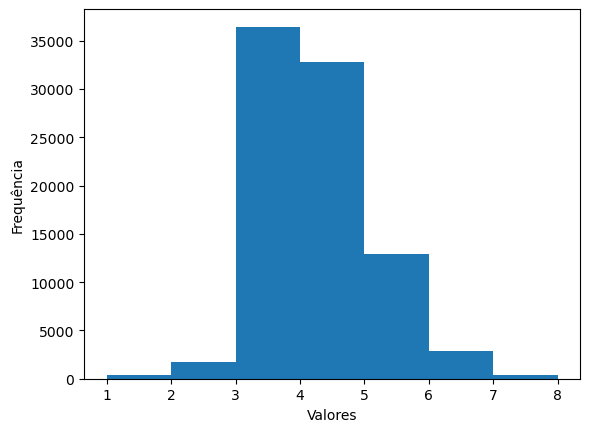

In [ ]:
#Visualizacao da distribuicao após cortes
plt.hist(DPOC["imc"], bins=7)
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

### Atributos relacionados ao hábito de fumar.

O hábito de fumar é trabalhado baseado em um cálculo de carga tabágica baseado no seguinte: A carga tabágica (anos-maço) de cada indivíduo foi calculada pela seguinte fórmula: número de cigarros consumidos por dia, dividido por 20 e multiplicado pelo número de anos de tabagismo.

http://www.sopterj.com.br/wp-content/themes/_sopterj_redesign_2017/_revista/2017/n_01/03-artigo.pdf

Uma carga tabágica igual ou maior do que 10 anos-maço ou uma exposição à biomassa por mais de 200 horas-ano ou 10 anos, especialmente em indivíduo com idade de 40 anos ou mais, representa um risco elevado para DPOC.

Fatores que são complicadores é a qualidade do cigarro - por exemplo - se possui um filtro adequado, aonde não seria possível determinar com exatidão qual geraria mais danos - Ou seja, vou fazer a escolha de tratar por igual todos os tipos de cigarro, apesar no nível químico biológico, o filtro, o material e a qualidade do cigarro alterariam. Para médicos comuns, é irrelevante, o hábito por si só é uma chaga.

Houve uma tentativa de cálculo da carga tabágica de todos os indíviduos fumantes, todavia a pergunta que delimita uma faixa temporal só é marcada para aqueles fumantes que são fumantes diários. Os que não são fumantes diários ou que não eram, não é possível realizar o cálculo.

Será necessário trabalhar - Aonde a carga tabágica deve ser voltada a cigarros industrializados. Todo e qualquer fumo que não seja nesse tópico será retirado e não calculado, tendo em vista a falta de relevância.

Perguntas sobre o hábito


| Pergunta | Descrição | Valor | Opção |
|----------|-----------|-------|-------|
| P050 | Atualmente, o(a) Sr(a) fuma algum produto do tabaco? | 1 | Sim, diariamente |
|       |                                                      | 2 | Sim, menos que diariamente |
|       |                                                      | 3 | Não fumo atualmente |
|       |                                                      | 9 | Ignorado |
|       |                                                      |   | Não aplicável |


In [ ]:
DPOC['P050'] = DPOC['P050'].replace({1: 2,2: 1,3: 0,9: 0})
DPOC = DPOC.rename(columns={'P050': 'FumoAtual'})

Demais Perguntas

| Pergunta | Descrição | Valor | Opção |
|----------|-----------|-------|-------|
| P052 | E no passado, o(a) Sr(a) fumou algum produto do tabaco? | 1 | Sim, diariamente |
|       |                                                      | 2 | Sim, menos que diariamente |
|       |                                                      | 3 | Não, nunca fumei |
|       |                                                      | 9 | Ignorado |
|       |                                                      |   | Não aplicável |

Transformação

|Grau de Risco|Fumo|
|---|---|
|0| Não, nunca fumei|
|1| Sim, menos que diariamente|
|2| Sim, diariamente|


In [ ]:
#Transformação da segunda pergunta [P052]
DPOC['P052'] = DPOC['P052'].map({1: 2,2: 1,3: 0,9: 0})
DPOC = DPOC.rename(columns={'P052': 'FumoPassado'})

In [ ]:
#Tendo em vista que o hábito de fumo passado é um dos pilares de análise para determinação da DPOC;
#A pessoa ao não responder a questão gera danos para análise, ou seja, será retirado da população de análise
DPOC['FumoPassado'].isnull().sum()

11023

In [ ]:
#Tendo em vista que o hábito de fumo passado é um dos pilares de análise para determinação da DPOC;
#A pessoa ao não responder a questão gera danos para análise, ou seja, será retirado da população de análise
DPOC = DPOC.dropna(subset=['FumoPassado'])

Chega-se a conclusão que o cálculo de carga tabágica só seria computado para aqueles que fumam/fumaram cigarros industrializados. Ou seja, o modelo penderia a identificar somente àqueles que fumam cigarros industrializados.

## DPOC

|Q074|Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)? |
|---|---|
|1|Sim|
|2|Não|
| |Não aplicável|

Aplica-se o Grau de risco aonde:

|Grau de Risco|Ambiente|
|---|---|
|0| Não|
|1| Sim|
|0| Não aplicável |

In [ ]:
#Q11701 - refere-se a data de diagnostico, deve-se adicionar?
#DPOC é o guarda-chuva da bronquite, asma e enfisema. Aonde o DPOC seria o "ultimo grau" dessas doencas.
#DPOC = enfisema + bronquite
#Necessário tirar as demais colunas
colunas_para_remover = ['Q11605', 'Q11606']

# Remova as colunas especificadas
DPOC = DPOC.drop(colunas_para_remover, axis=1)

In [ ]:
DPOC['Q074'].isnull().sum()

0

In [ ]:
DPOC['Q074'] = DPOC['Q074'].map({1: 1, 2: 0})
DPOC = DPOC.rename(columns={'Q074': 'DiagAsma'})

In [ ]:
DPOC['DiagAsma'].value_counts()

0    72861
1     3701
Name: DiagAsma, dtype: int64

|Q11604|Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)? |
|---|---|
|1|Sim|
|2|Não|
| |Não aplicável|

Aplica-se o Grau de risco aonde:

||Classificacao|
|---|---|
|0| Não|
|1| Sim|
|0| Não aplicável |

In [ ]:
DPOC['Q11604'].value_counts()

2    75565
1      997
Name: Q11604, dtype: int64

In [ ]:
DPOC['Q11604'] = DPOC['Q11604'].map({1: 1, 2: 0})
DPOC = DPOC.rename(columns={'Q11604': 'DiagDPOC'})

In [ ]:
DPOC.columns

Index(['RiscoDom', 'lixo_queima', 'C008', 'risco_ocupacional',
       'ambiente_ocupacional', 'ocupQuimicos', 'ocupMineral', 'FumoAtual',
       'P051', 'FumoPassado', 'P053', 'P05401', 'P05402', 'P05403', 'P05404',
       'P05405', 'P05406', 'P05407', 'P05408', 'P05409', 'P05410', 'P05411',
       'P05412', 'P05413', 'P05414', 'P05415', 'P05416', 'P05417', 'P05418',
       'P05419', 'P05421', 'P05422', 'P058', 'P05801', 'P05802', 'P05901',
       'DiagAsma', 'DiagDPOC', 'idade_risco', 'imc'],
      dtype='object')

In [ ]:
#Retirada final das colunas não utilizadas
colunas_para_remover = ['P053', 'P05401', 'P05402', 'P05403', 'P05404',
       'P05405', 'P05406', 'P05407', 'P05408', 'P05409', 'P05410', 'P05411',
       'P05412', 'P05413', 'P05414', 'P05415', 'P05416', 'P05417', 'P05418',
       'P05419', 'P05421', 'P05422', 'P058', 'P05801', 'P05802', 'P05901','P051','C008']
# Remova as colunas especificadas
DPOC = DPOC.drop(colunas_para_remover, axis=1)

TABELA FINAL

In [ ]:
DPOC

,RiscoDom,lixo_queima,risco_ocupacional,ambiente_ocupacional,ocupQuimicos,ocupMineral,FumoAtual,FumoPassado,DiagAsma,DiagDPOC,idade_risco,imc
0,2,0,0,1.0,0.0,0.0,0,2.0,0,0,3,4
2,2,0,0,2.0,1.0,0.0,0,2.0,0,0,2,5
3,2,0,0,2.0,0.0,0.0,0,0.0,0,0,3,3
4,2,0,0,0.0,0.0,0.0,0,0.0,0,0,0,2
5,2,0,0,0.0,0.0,0.0,0,2.0,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
90839,1,1,0,1.0,1.0,0.0,0,0.0,0,0,2,3
90840,1,0,0,0.0,0.0,0.0,0,0.0,1,0,0,5
90843,1,1,0,0.0,0.0,0.0,0,2.0,0,0,1,5
90844,1,1,0,2.0,0.0,0.0,0,0.0,0,0,3,5


In [ ]:
DPOC.to_csv('DPOCFINAL.csv', index=False)